In [84]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [24]:
df = load_breast_cancer()

In [25]:
cancer = pd.DataFrame(data=df['data'], columns=df['feature_names'])

In [85]:
cancer['target'] = df['target']
y = cancer['target']

In [27]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [52]:
cancer_features = cancer.iloc[:,:30]

In [53]:
pca = PCA(n_components=15)
fit = pca.fit(cancer_features)
# summarize components
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    fit.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09]


In [87]:
X_train, X_test, y_train, y_test= train_test_split(cancer_features, y, test_size=0.25, random_state=36)

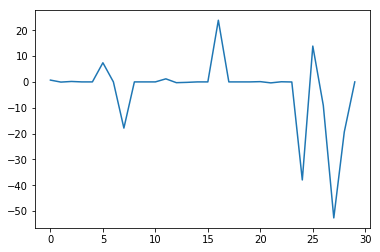

In [106]:
lr_L1 = LogisticRegression(C=35, penalty='l1')
lr_L1.fit(X_train, y_train)
plt.plot(lr_L1.coef_.flatten())

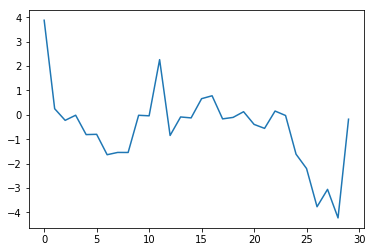

In [107]:
lr_L2 = LogisticRegression(C=35)
lr_L2.fit(X_train, y_train)
plt.plot(lr_L2.coef_.flatten())

In [122]:
ridgeregr = linear_model.Ridge(alpha=0.5, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
origparams = ridgeregr.coef_[0]
print(origparams)
print(ridgeregr.score(X_test, y_test))

0.7020080690560138
0.7661728379841151
0.6234379592630579


In [137]:
lass = linear_model.Lasso(alpha=.04)
lassfit = lass.fit(X_train, y_train)
print('R² for the model with few features:')
print(lass.score(X_train, y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)
print(lass.score(X_test, y_test))

R² for the model with few features:
0.6654012966923252

Parameter estimates for the model with few features:
[-0.00000000e+00  0.00000000e+00 -7.96135454e-04  2.73238771e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -4.08850062e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.32347033e-02 -1.95845544e-02  4.53939799e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.58165229e+00]
0.6834469047527332


In [162]:
X_features = cancer.loc[:,['worst texture', 'worst perimeter', 'worst area', 'area error', 'mean perimeter']]

In [163]:
import statsmodels.api as sm
# Declare predictors.
X_statsmod = X_features

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(y, X_statsmod)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.113275
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Dec 2018   Pseudo R-squ.:                  0.8285
Time:                        14:46:50   Log-Likelihood:                -64.453
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                2.734e-132
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
worst texture      -0.2596      0.049     -5.317      0.000      -0.355      -0.164
worst perimet

In [164]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(y, pred_y_statsmod)

print('\n Accuracy of benign and ma')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy of benign and ma
col_0     0    1
target          
0       194   18
1        11  346

 Percentage accuracy
0.9490333919156415


In [174]:
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X_features, y, test_size=0.25, random_state=36)

ridgeregr2 = linear_model.Ridge(alpha=0.02, fit_intercept=False) 
ridgeregr2.fit(X_train_2, y_train_2)
print(ridgeregr2.score(X_train_2, y_train_2))
origparams2 = ridgeregr2.coef_[0]
print(origparams2)
print(ridgeregr2.score(X_test_2, y_test_2))

0.6645851982817758
-0.01440346731401173
0.681717330250881


In [172]:
lass2 = linear_model.Lasso(alpha=0.02)
lassfit2 = lass2.fit(X_train_2, y_train_2)
print('R² for the model with few features:')
print(lass2.score(X_train_2, y_train_2))
origparams2 = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams2)
print(lass2.score(X_test_2, y_test_2))

R² for the model with few features:
0.6643584800862721

Parameter estimates for the model with few features:
[-0.00000000e+00 -1.32393863e-02 -1.95202157e-02  4.51191613e-04
 -4.11921555e-04  2.80289143e-04 -9.18596467e-04  0.00000000e+00
  2.58405444e+00]
0.6790191395692591


All models here work about equally well. It appears after doing a PCA and looking at the coefficents of the lasso that most of the results could be predicted by the worst case side. This makes some intuitive sense since we are talking about cancer. When the cancer is at its largest area, radius, and perimeter. The cancer will be most noticable because it has grown to be its largest size. The lasso regression is certainly the post straightforward since after doing the PCa we could see that the majority of the result was from one component with several others included just to increase accuracy. 